In [1]:
import pickle

TENSOR_PATH = "/Users/efrainflores/Desktop/Nowports/repos/cora_cleaner/data/tensors/paths_tensors_2023-08-08_test_small.xz"
with open(TENSOR_PATH, 'rb') as handle:
    paths, tensors = pickle.load(handle)

clean, noisy = zip(*tensors)

In [2]:
from numpy import array
from torch import Tensor

clean = Tensor(array(clean))
noisy = Tensor(array(noisy))

clean.shape, noisy.shape

(torch.Size([79, 25, 1]), torch.Size([79, 25, 1]))

In [3]:
paths['data/heart_sound_test_small/val/healthy/e00052.wav']

['data/heart_noised_test_small/-val-healthy-e00052_19dB_seg_386noise.mp3',
 'data/heart_noised_test_small/-val-healthy-e00052_17dB_seg_285noise.mp3',
 'data/heart_noised_test_small/-val-healthy-e00052_22dB_seg_47noise.mp3',
 'data/heart_noised_test_small/-val-healthy-e00052_21dB_seg_53noise.mp3',
 'data/heart_noised_test_small/-val-healthy-e00052_20dB_seg_523noise.mp3']

In [8]:
from pydub import AudioSegment

audio_clean = AudioSegment.from_file('data/heart_sound_test_small/val/healthy/e00052.wav')
audio_noisy = AudioSegment.from_file('data/heart_noised_test_small/-val-healthy-e00052_17dB_seg_285noise.mp3')

audio_clean = array(audio_clean.get_array_of_samples())
audio_noisy = array(audio_noisy.get_array_of_samples())

(20, 108)


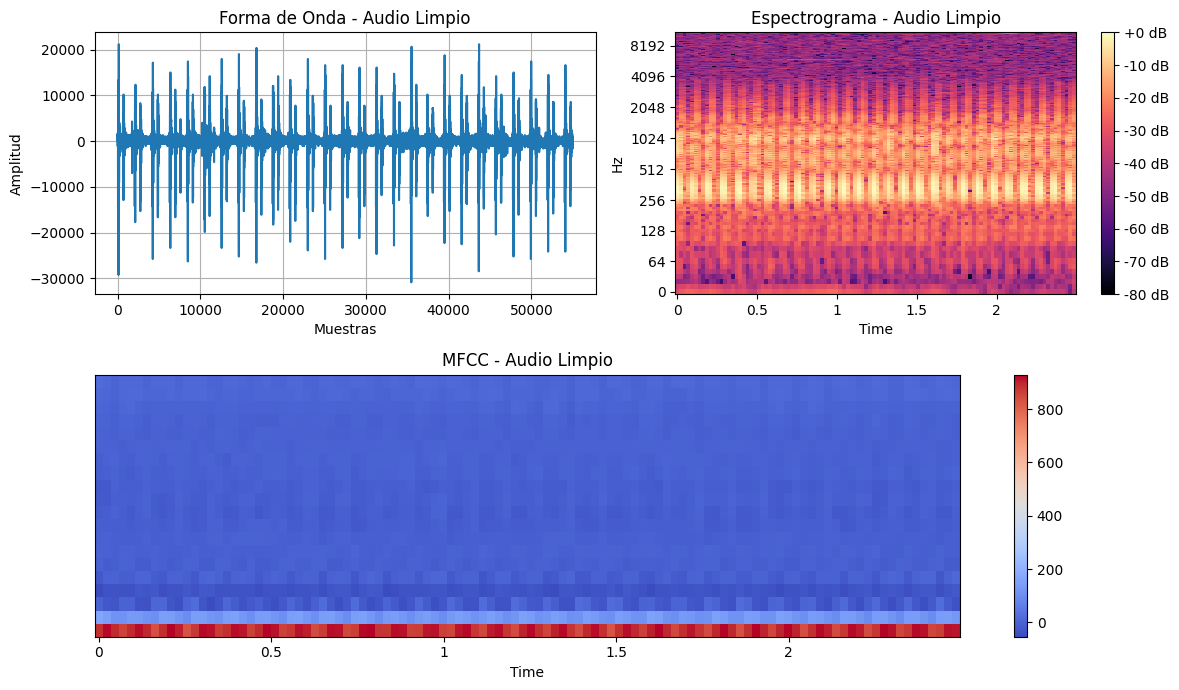

(20, 430)


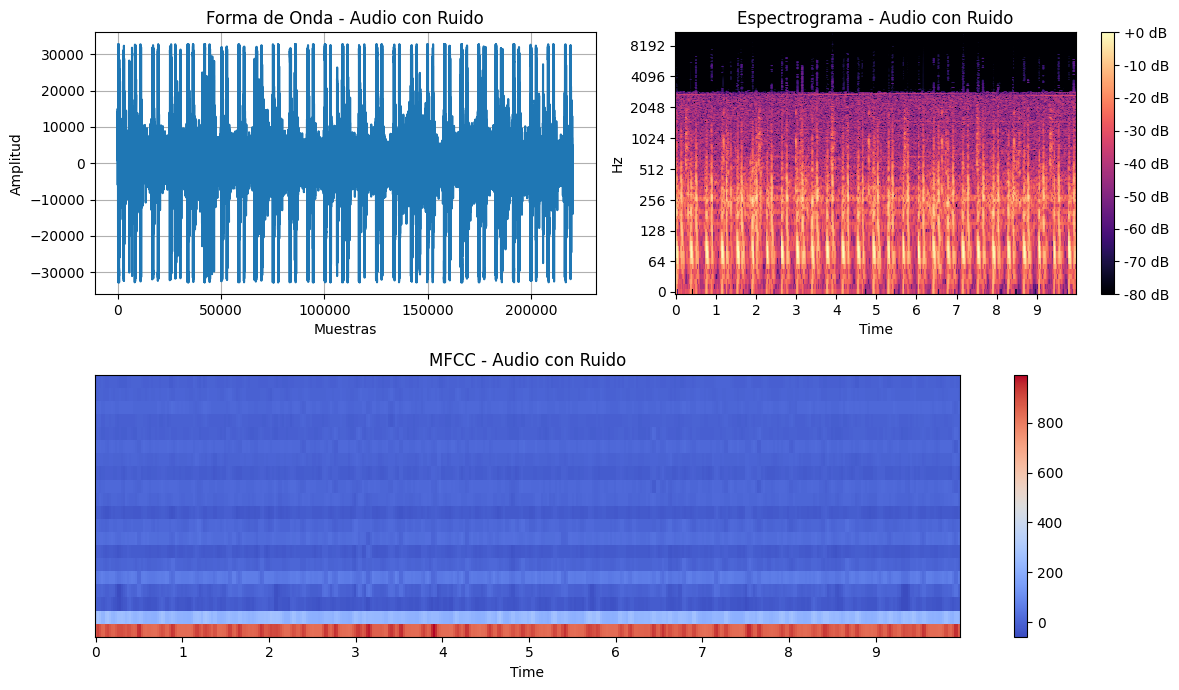

In [13]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

def plot_audio_sample(audio_data, title):
    """
    Grafica un registro de audio de tamaño 25x1, su espectrograma y su MFCC.
    
    Args:
        audio_data (numpy.ndarray): Datos de audio de tamaño 25x1.
        title (str): Título para el gráfico.
    """
    plt.figure(figsize=(12, 7))
    
    # Convertir los datos de audio a formato de punto flotante
    audio_data_float = audio_data.astype(np.float32)
    
    # Gráfico de la forma de onda
    plt.subplot(2, 2, 1)
    plt.plot(audio_data_float)
    plt.title('Forma de Onda - ' + title)
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)
    
    # Espectrograma
    plt.subplot(2, 2, 2)
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data_float.squeeze())), ref=np.max)
    librosa.display.specshow(spectrogram, sr=22050, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma - ' + title)
    
    # MFCC
    plt.subplot(2, 1, 2)
    mfcc = librosa.feature.mfcc(y=audio_data_float.squeeze(), sr=22050)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC - ' + title)
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# Supongamos que audio_clean es un registro limpio y audio_noisy es un registro con ruido
plot_audio_sample(audio_clean, 'Audio Limpio')
plot_audio_sample(audio_noisy, 'Audio con Ruido')
